<a href="https://colab.research.google.com/github/dnezan/km-prediction/blob/main/KM_forecast_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KwickMetrics Forecast Practice**
Dinesh Sreekanthan<br>
https://github.com/dnezan/km-prediction (private)

# Data Overview
The dataset has 3 columns
<br>
*   SKU ID
*   Date
*   Number of items sold that day

By using the function `=COUNTUNIQUE(A:A)` in Google Spreadsheets, we can find the number of unique items being sold. <br>

**There are 3786 unique items being sold over a period of about 1 year (01.01.2021 - 25.11.2021)**

# Setting up Cloud Drive

In [286]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [287]:
%cd "/content/drive/My Drive"

/content/drive/My Drive


In [288]:
!mkdir km-forecast-practice
!ls

mkdir: cannot create directory ‘km-forecast-practice’: File exists
 360review	    km-forecast-practice
'Colab Notebooks'   km-forecast-practice-data.gsheet
 csvfiles	   'Untitled spreadsheet.gsheet'
 Invoice.gsheet


In [289]:
%cd "/content/drive/My Drive/km-forecast-practice"

/content/drive/My Drive/km-forecast-practice


Make sure to move your dataset `km-forecast-practice.csv` to this folder.

In [290]:
!ls

dataset_new.csv  graph3.png  graph.svg			    temppp.csv
graph2.png	 graph.png   km-forecast-practice-data.csv


In [291]:
import pandas as pd
import csv
import datetime

df=pd.read_csv('km-forecast-practice-data.csv')
df['timestamp']= pd.to_datetime(df['timestamp'])
print(df.dtypes)
df.head()


item_id              object
timestamp    datetime64[ns]
demand                int64
dtype: object


,item_id,timestamp,demand
0,AP001AA01,2021-01-01,10
1,AP001AA01,2021-01-02,6
2,AP001AA01,2021-01-03,9
3,AP001AA01,2021-01-04,7
4,AP001AA01,2021-01-05,10


# Preprocessing the Data
The first step is to rearrange the data so that we have each column representing a day and the rows containing the SKU ID. <br> 
We must also populate the data with missing dates, which we assume have 0 items sold on that day. So the first step is to add the missing dates, then set these as 0.

In [308]:
start_date=df.timestamp[0].date()  
end_date=df.timestamp.iat[-1].date()
start_sku=df.item_id[1]
print('Start date is',start_date)
print('End date is',end_date)
print("First SKU is",start_sku)

data = [[start_sku, 0]]

# Populating the new dataset with first row
df_new = pd.DataFrame(data, columns = ['SKU', start_date])
x = start_date

index = 2
var=0

while var<365:
  x+= datetime.timedelta(days=1)
  df_new.insert(loc=index, column=x, value=0)
  index+=1
  var+=1
df_new.head()

Start date is 2021-01-01
End date is 2021-10-08
First SKU is AP001AA01


,SKU,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,...,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14,2021-12-15,2021-12-16,2021-12-17,2021-12-18,2021-12-19,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01
0,AP001AA01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we add all the unique products and populate the Dataframe with 0s. (Takes a few minutes to complete)

In [309]:
print(df_new.shape[1]) #number of columns

uniqval = list(df.item_id.unique()) #list of unique products
uniqval.pop(0)
print(uniqval[5])
x=0
while x < len(uniqval):
  listofzeros = [0] * 366
  listofzeros.insert(0, uniqval[x])
  df_length = len(df_new)
  df_new.loc[df_length] = listofzeros
  x+=1
print(df_new)


367
AP002BA01UK
              SKU  2021-01-01  2021-01-02  ...  2021-12-30  2021-12-31  2022-01-01
0       AP001AA01           0           0  ...           0           0           0
1     AP001AA01CA           0           0  ...           0           0           0
2       AP001BA01           0           0  ...           0           0           0
3       AP002AA01           0           0  ...           0           0           0
4     AP002AA01CA           0           0  ...           0           0           0
...           ...         ...         ...  ...         ...         ...         ...
3780    WH103CB01           0           0  ...           0           0           0
3781    WH103DA01           0           0  ...           0           0           0
3782    WH103EA01           0           0  ...           0           0           0
3783    WH103EB01           0           0  ...           0           0           0
3784    WH103EC01           0           0  ...           0           0 

Next we fill in the values of items that were actually sold on a given day.

In [314]:
#Adding first product sales
count=-1
#while var<1000:
for x in df.item_id:
  if x == "AP001AA01": 
    count+=1
    z=df_new.columns.get_loc(pd.to_datetime(df.timestamp[count].date()).date())
    z1=df_new.index.get_loc(df_new.index[df_new['SKU'] == x][0])
    df_new.iloc[z1,z] = df.demand[count]


for x in df.item_id:
  if x == "AP001AA01CA": 
    count+=1
    z=df_new.columns.get_loc(pd.to_datetime(df.timestamp[count].date()).date())
    z1=df_new.index.get_loc(df_new.index[df_new['SKU'] == x][0])
    df_new.iloc[z1,z] = df.demand[count]

for x in df.item_id:
  if x == "AP001BA01": 
    count+=1
    z=df_new.columns.get_loc(pd.to_datetime(df.timestamp[count].date()).date())
    z1=df_new.index.get_loc(df_new.index[df_new['SKU'] == x][0])
    df_new.iloc[z1,z] = df.demand[count]

for x in df.item_id:
  if x == "AP002AA01": 
    count+=1
    z=df_new.columns.get_loc(pd.to_datetime(df.timestamp[count].date()).date())
    z1=df_new.index.get_loc(df_new.index[df_new['SKU'] == x][0])
    df_new.iloc[z1,z] = df.demand[count]

    
      
print("This product was sold on",count,"days")
df_new.head()

#Adding the rest of the product sales 

This product was sold on 703 days


,SKU,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-23,2021-01-24,2021-01-25,2021-01-26,2021-01-27,2021-01-28,2021-01-29,2021-01-30,2021-01-31,2021-02-01,2021-02-02,2021-02-03,2021-02-04,2021-02-05,2021-02-06,2021-02-07,2021-02-08,...,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09,2021-12-10,2021-12-11,2021-12-12,2021-12-13,2021-12-14,2021-12-15,2021-12-16,2021-12-17,2021-12-18,2021-12-19,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31,2022-01-01
0,AP001AA01,10,6,9,7,10,4,7,8,7,13,7,7,12,10,7,9,8,10,4,1,0,0,2,9,5,5,7,5,6,5,12,10,9,8,6,5,7,3,11,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AP001AA01CA,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AP001BA01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AP002AA01,12,11,6,7,5,8,10,6,7,8,12,8,8,5,8,2,5,3,6,9,4,3,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,1,3,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,AP002AA01CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [311]:
df_new.to_csv('dataset_new.csv')

# Visualisation
Here we can visualise the sales of the first product in our dataset over a year.


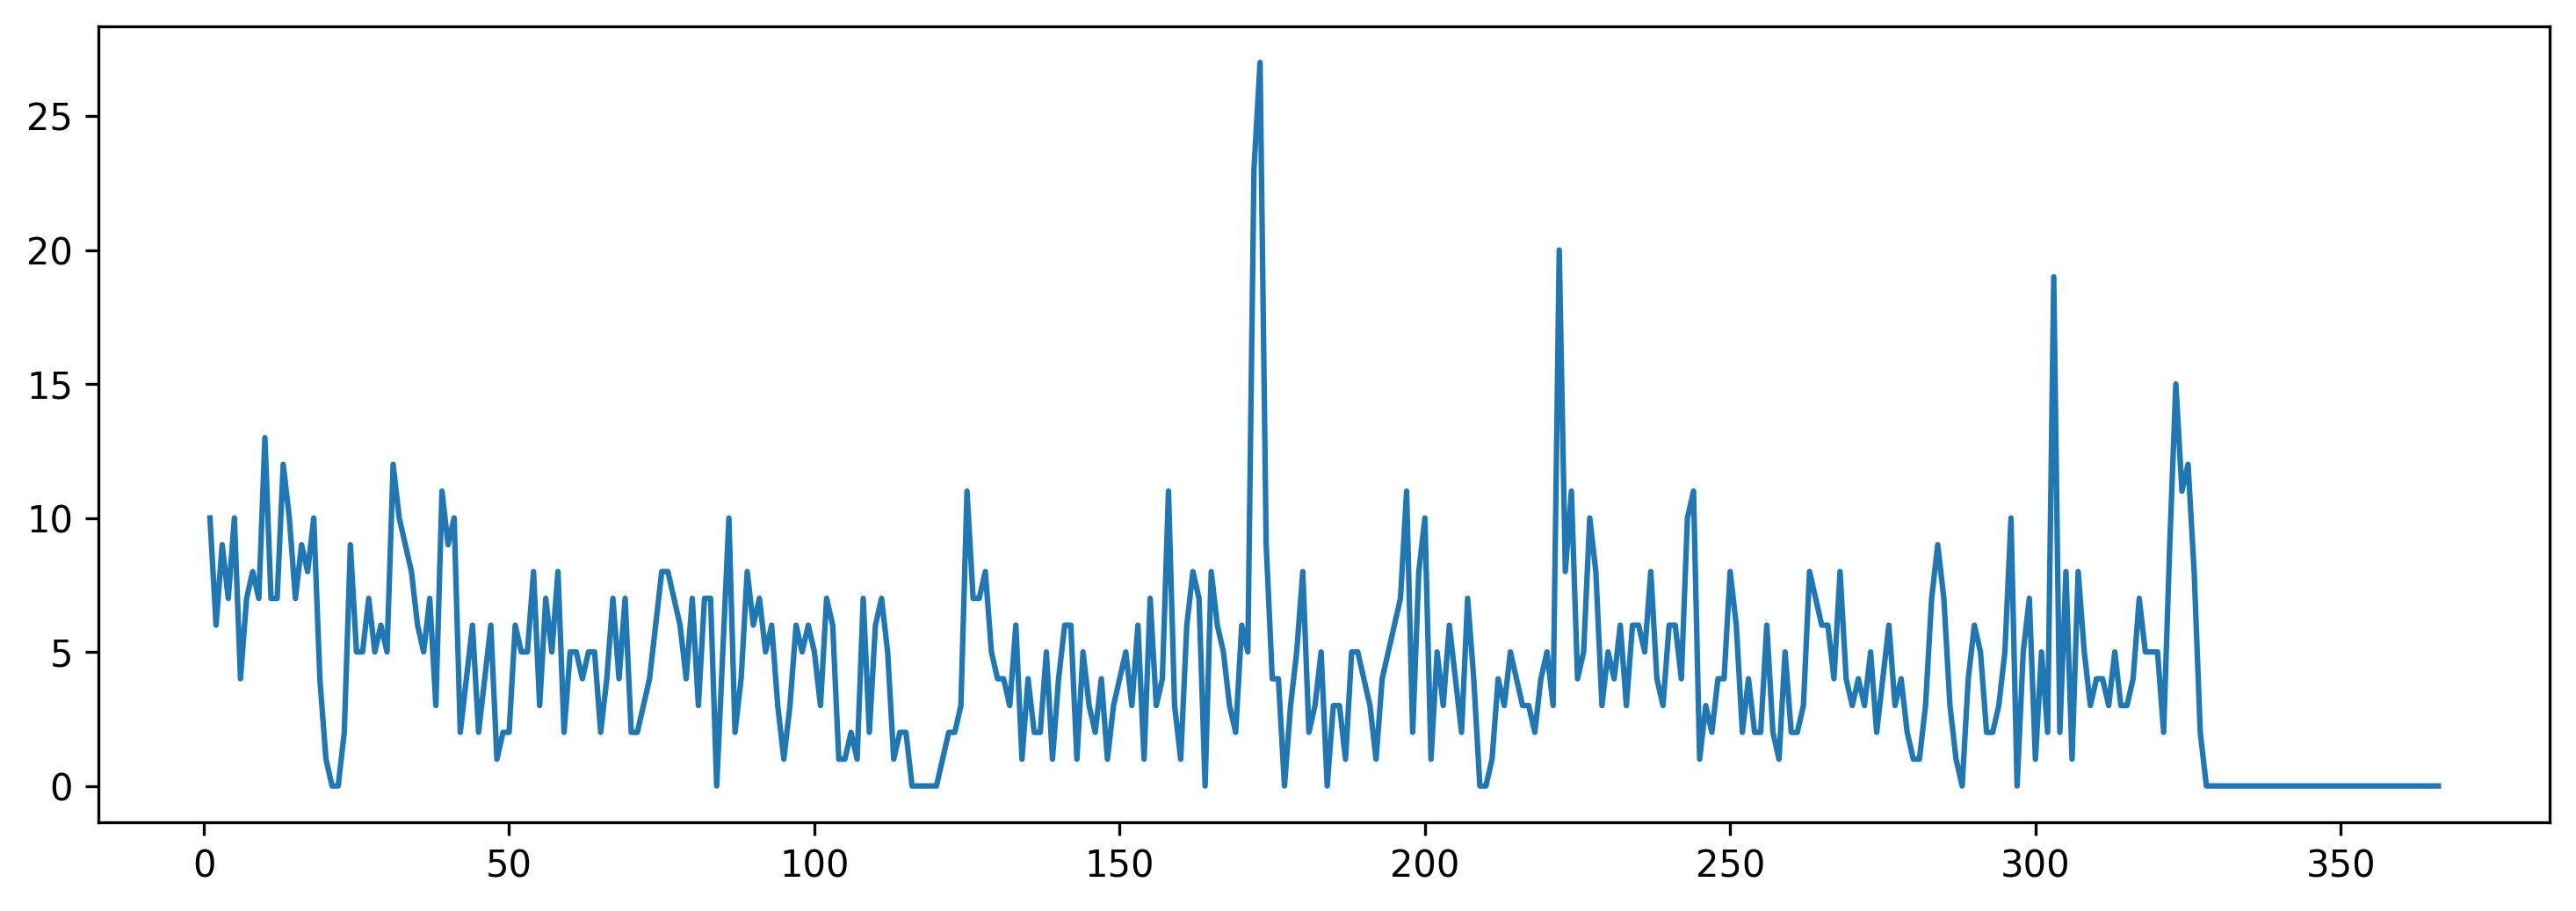

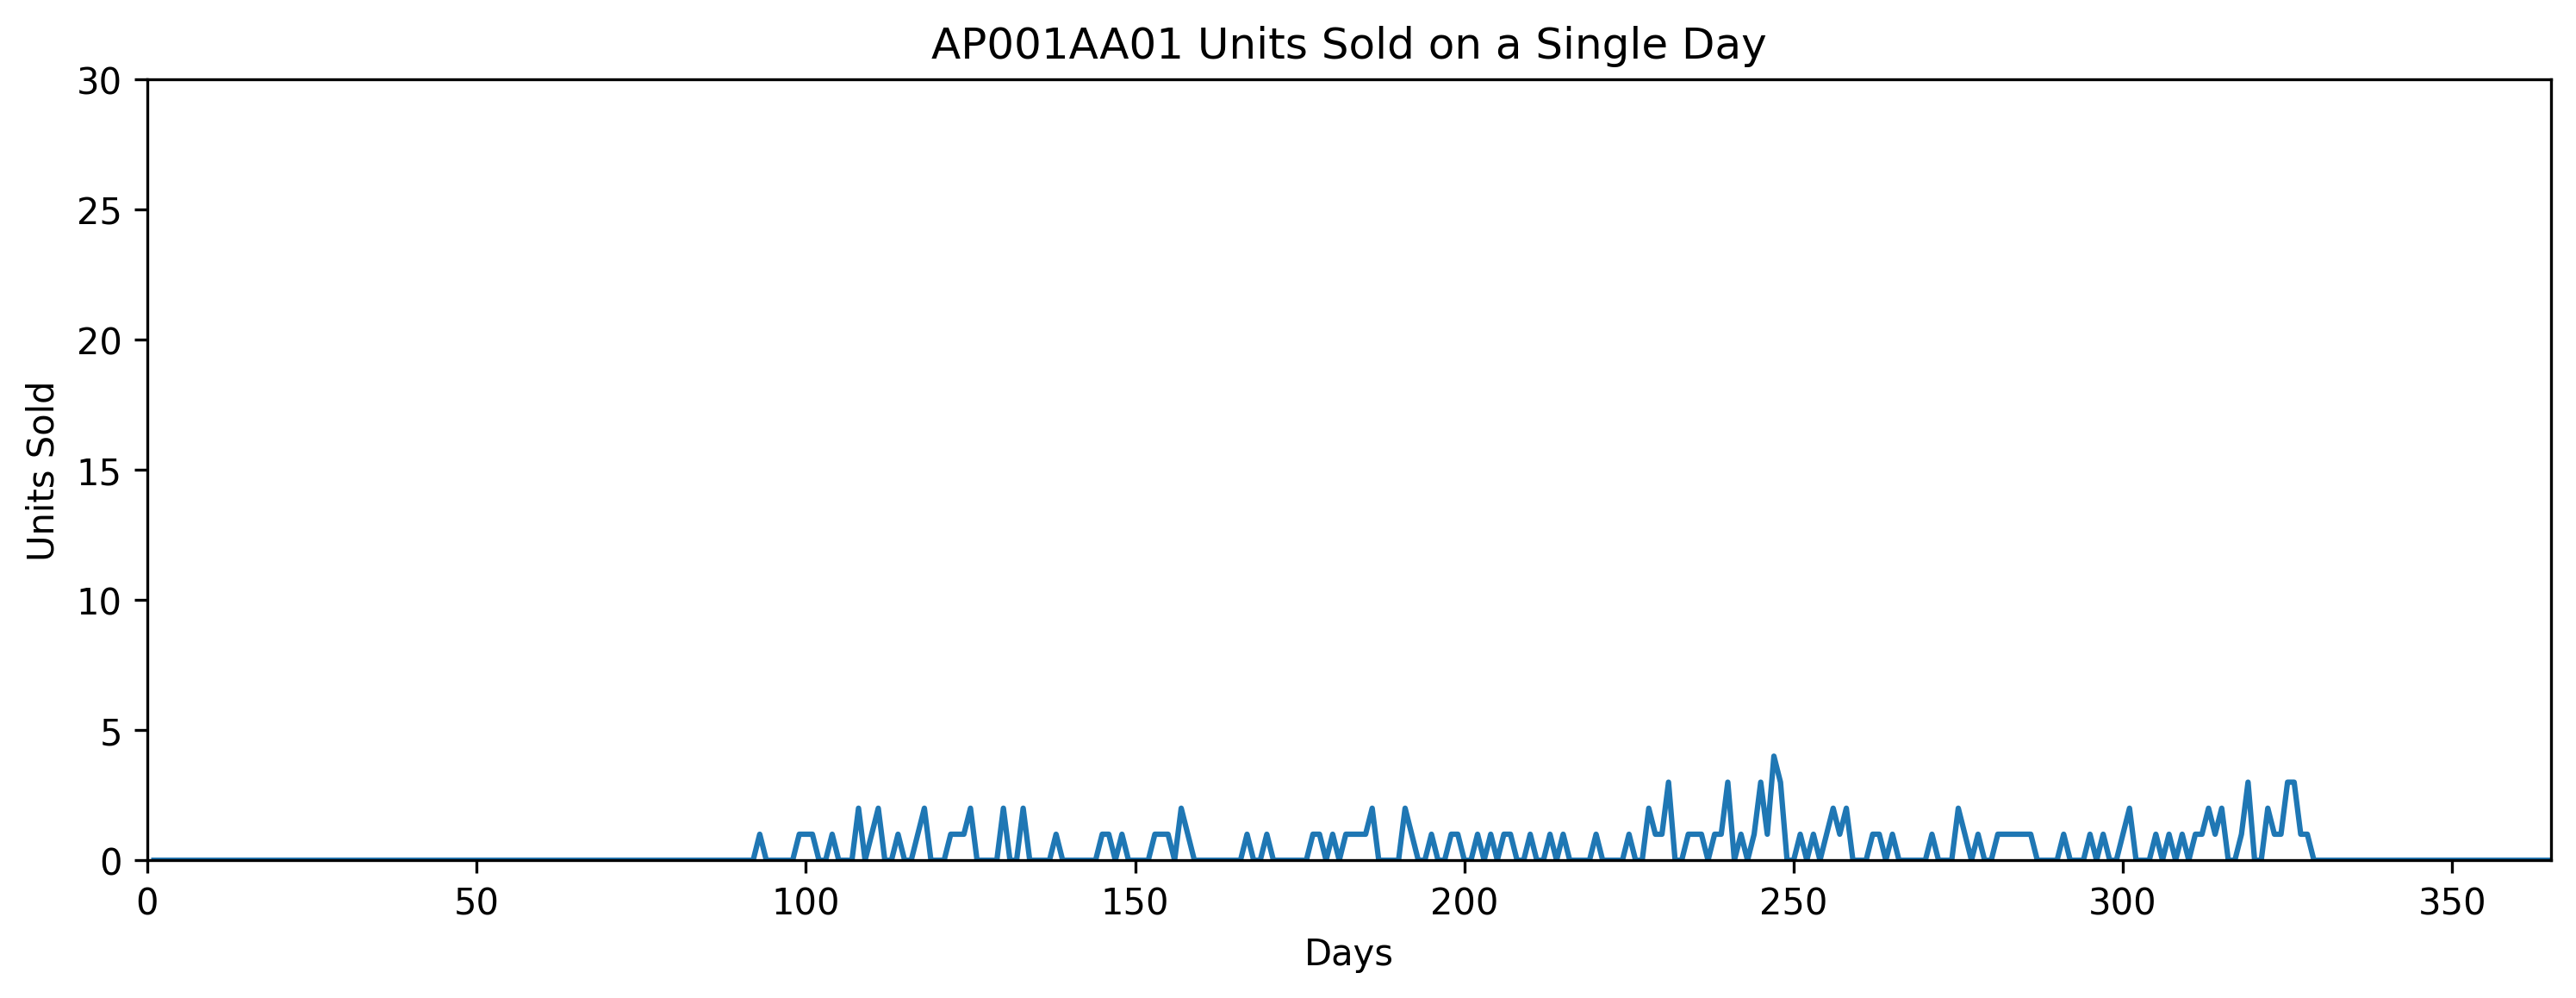

In [315]:
import matplotlib.pyplot as plt
import numpy as np

##Plotting first product
temp = df_new.iloc[0].tolist()
del temp[0]

xpoints =range(1, 367)
xpoints=list(xpoints)

f = plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(4)
plt.plot(xpoints, temp)

##Plotting second product
temp = df_new.iloc[2].tolist()
del temp[0]

xpoints =range(1, 367)
xpoints=list(xpoints)

f = plt.figure(dpi=300)
f.set_figwidth(12)
f.set_figheight(4)
plt.plot(xpoints, temp)



plt.xlabel('Days')
plt.ylabel('Units Sold')
plt.title('AP001AA01 Units Sold on a Single Day')
plt.savefig("graph2.png") #PNG saved to Drive
plt.savefig("graph.svg") #Lossless SVG saved to Drive
plt.xlim([0,365])
plt.ylim([0,30])
plt.show()

# Training Neural Network


In [297]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
X = 
clf.fit(X, y)
clf.predict()

SyntaxError: ignored